In [1]:
import data_methods as dm 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

segment_folder = r'D:\MS Sinuosity Data\Segments'
comparison_path = r'D:\MS Sinuosity Data\Data from Sam\LeopoldWolmanApp8_noflume.xlsx'
compressed_discharge_path = r'D:\CDS River Discharge\Pickles\compressed_ra_recint.pickle'  

segments = os.listdir(segment_folder)
comp_x = pd.read_excel(comparison_path)

seg_data_wave = []
seg_data_dis = []

for seg in segments: #iterate through all files in 'Segments' folder 
    if seg != 'data_descriptions.txt':
        if seg[0] != '~': #weird excel coding for autosave version of file 
            print(seg)
            path = os.path.join(segment_folder, seg)
            seg_x = pd.read_excel(path)
            
            #use nearest neighbors method to assign values fom compressed_ra.pickle to segment in question 
            dm.assign_cop_to_latlon(path, compressed_discharge_path)
            seg_x = pd.read_excel(path) #read the file just written 
            print('')
            #get meander wavelength and discharge data 
            seg_data_wave.append(np.mean(seg_x['Meandwave'].tolist()))
            seg_data_dis.append(np.mean(seg_x['rec2'].tolist()))

Seg1.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 2.4182844161987305 seconds ---

Seg10.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5236001014709473 seconds ---

Seg11.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4418179988861084 seconds ---

Seg12.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4478647708892822 seconds ---

Seg13.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4318122863769531 seconds ---

Seg14.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.41883134841918945 seconds ---

Seg15.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4248316287994385 seconds ---

Seg16.xlsx
entry 0
writing new columns to dataframe...
rewriti

C:\Users\bydd1\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4461493492126465 seconds ---

Seg4.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.44081950187683105 seconds ---

Seg5.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.44377899169921875 seconds ---

Seg6.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4308476448059082 seconds ---

Seg7.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.441864013671875 seconds ---

Seg8.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4491419792175293 seconds ---

Seg9.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.40991973876953125 seconds ---



In [2]:
#read leopold/wolman data transcribed by Sam 
leopold_x = pd.read_excel(comparison_path)
leopold_wave = leopold_x['Wavelength (m)'].tolist()
leopold_dis = leopold_x['Qbankfull (cms)'].tolist()

In [3]:
d_wave = np.log10(seg_data_wave)
d_dis = np.log10(seg_data_dis)
l_wave = np.log10(leopold_wave)
l_dis = np.log10(leopold_dis)

# Q as a function of $\lambda$ 

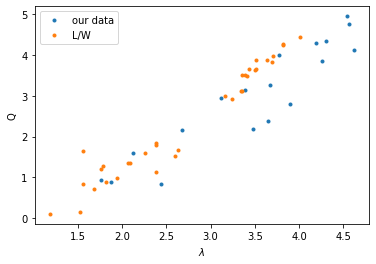

In [4]:
plt.figure()
plt.plot(d_wave, d_dis, '.')
plt.plot(l_wave, l_dis, '.')
plt.xlabel('$\lambda$')
plt.ylabel('Q')
plt.legend(['our data', 'L/W'])
from scipy import stats

In [5]:
dslope, dintercept, dr, dp, derr = stats.linregress(d_wave, d_dis)

In [6]:
lslope, lintercept, lr, lp, lerr = stats.linregress(l_wave, l_dis)

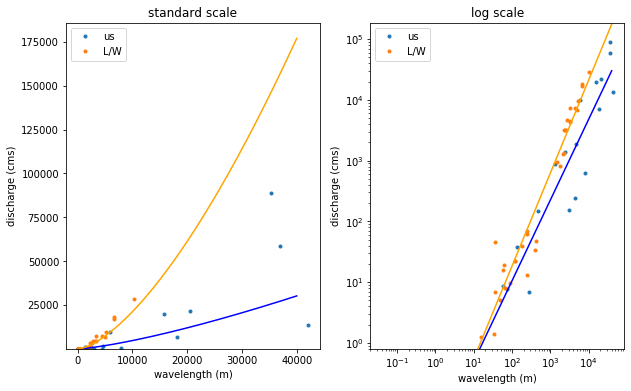

In [7]:
plt.figure(figsize = (10, 6))

def code():
    plt.plot(seg_data_wave, seg_data_dis, '.')
    plt.plot(leopold_wave, leopold_dis, '.')
    plt.xlabel('wavelength (m)')
    plt.ylabel('discharge (cms)')
    x = np.linspace(0, 40000, 1000000)
    y1 = [10**dintercept*xv**dslope for xv in x]
    plt.plot(x, y1, color = 'blue')
    y2 = [10**lintercept*xv**lslope for xv in x]
    plt.plot(x, y2, color = 'orange')
    plt.axis(ymin = 10**-0.1)
    plt.legend(['us', 'L/W'], loc = 'upper left')
    
plt.subplot(1,2,1)
code()
plt.title('standard scale')
plt.subplot(1,2,2)
code()
plt.title('log scale')
plt.xscale('log')
plt.yscale('log')



In [8]:
alw = 10**lintercept
print('Leopold and Wolman')
print('Q = ' +str(alw) + ' * lambda ^ ' + str(lslope))
print('R^2 = ' + str(lr*lr))
print('p = ' + str(lp))
print('N = ' + str(len(leopold_wave)))

dlw = 10**dintercept
print('')
print('Our data')
print('Q = ' +str(dlw) + ' * lambda ^ ' + str(dslope))
print('R^2 = ' + str(dr*dr))
print('p = ' + str(dp))
print('N = ' + str(len(seg_data_wave)))

Leopold and Wolman
Q = 0.016144092402292705 * lambda ^ 1.5297333430391276
R^2 = 0.9441794243080928
p = 1.277621704644727e-21
N = 34

Our data
Q = 0.023302255813434716 * lambda ^ 1.3283664714731036
R^2 = 0.8637925270324025
p = 2.4818054316388205e-08
N = 18


# $\lambda$ as a function of Q

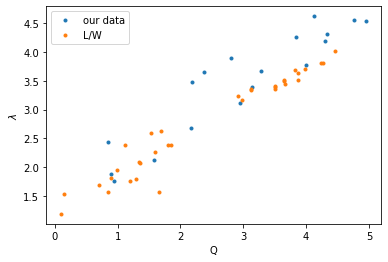

In [9]:
plt.figure()
plt.plot(d_dis, d_wave, '.')
plt.plot(l_dis, l_wave, '.')
plt.ylabel('$\lambda$')
plt.xlabel('Q')
plt.legend(['our data', 'L/W'])
from scipy import stats

In [10]:
dslope, dintercept, dr, dp, derr = stats.linregress(d_dis, d_wave)
lslope, lintercept, lr, lp, lerr = stats.linregress(l_dis, l_wave)

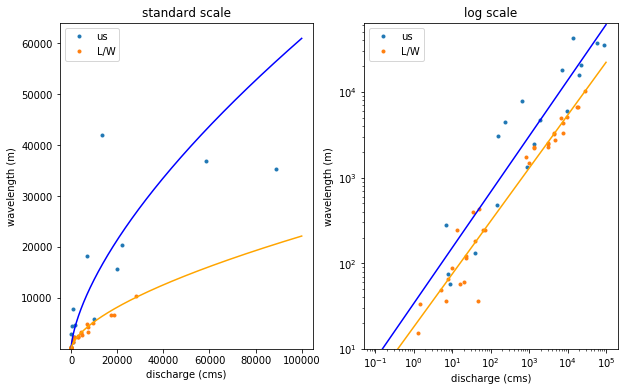

In [11]:
plt.figure(figsize = (10, 6))

def code():
    plt.plot(seg_data_dis, seg_data_wave, '.')
    plt.plot(leopold_dis, leopold_wave, '.')
    plt.ylabel('wavelength (m)')
    plt.xlabel('discharge (cms)')
    x = np.linspace(0, 100000, 1000000)
    y1 = [10**dintercept*xv**dslope for xv in x]
    plt.plot(x, y1, color = 'blue')
    y2 = [10**lintercept*xv**lslope for xv in x]
    plt.plot(x, y2, color = 'orange')
    plt.axis(ymin = 10)
    plt.legend(['us', 'L/W'], loc = 'upper left')
    
plt.subplot(1,2,1)
code()
plt.title('standard scale')
plt.subplot(1,2,2)
code()
plt.title('log scale')
plt.xscale('log')
plt.yscale('log')


In [12]:
alw = 10**lintercept
print('Leopold and Wolman')
print('lambda = ' +str(alw) + ' * Q ^ ' + str(lslope))
print('R^2 = ' + str(lr*lr))
print('p = ' + str(lp))
print('N = ' + str(len(leopold_wave)))

dlw = 10**dintercept
print('')
print('Our data')
print('lambda = ' +str(dlw) + ' * Q ^ ' + str(dslope))
print('R^2 = ' + str(dr*dr))
print('p = ' + str(dp))
print('N = ' + str(len(seg_data_wave)))

Leopold and Wolman
lambda = 18.183191374829256 * Q ^ 0.6172183071019998
R^2 = 0.9441794243080928
p = 1.277621704644727e-21
N = 34

Our data
lambda = 34.17178050087486 * Q ^ 0.6502667340545656
R^2 = 0.8637925270324025
p = 2.4818054316388205e-08
N = 18
